<a href="https://colab.research.google.com/github/aSafarpoor/DSP-final-project/blob/main/For_DIP_final_project_Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
a = [0,4,5,9]
b = [2,2,3,3]

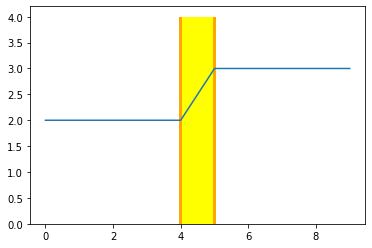

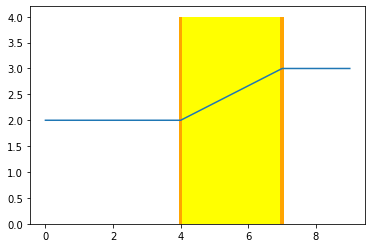

In [ ]:
a = [0,4,5,9]
b = [2,2,3,3]
plt.plot(a,b)
plt.bar([4.5],[4],1, color= 'yellow')
plt.bar([5],[4],0.11, color= 'orange')
plt.bar([4],[4],0.1, color= 'orange')
plt.show()

a = [0,4,7,9]
b = [2,2,3,3]
plt.plot(a,b)
plt.bar([5.5],[4],3, color= 'yellow')
plt.bar([7],[4],0.11, color= 'orange')
plt.bar([4],[4],0.1, color= 'orange')
plt.show()

In [ ]:
a = [0,4,4,9]
b = [2,2,3,3]

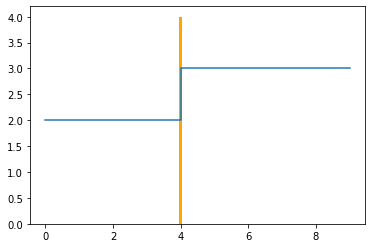

In [ ]:
plt.plot(a,b)
# plt.bar([5],[4],0.11, color= 'orange')
# plt.bar([4],[4],0.5, color= 'yellow')
plt.bar([4],[4],0.1, color= 'orange')

plt.show()

In [ ]:
import numpy as  np

In [ ]:
def imshower(img):
    fig = plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
a = np.zeros((100,100))
a[10:40,:] = 1
a[70:80,:] = 1
a[:,30:50] = 0.5

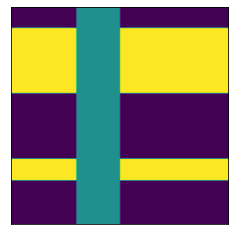

In [ ]:
imshower(a)

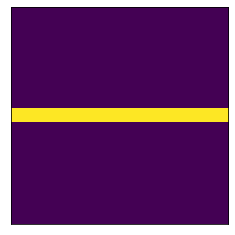

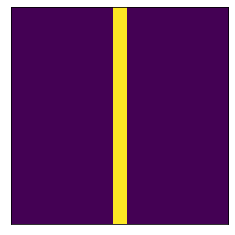

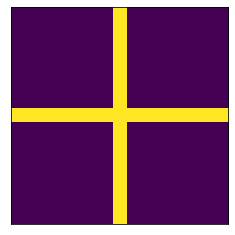

In [ ]:
kernel1 = np.zeros((15,15))
kernel1[7,:] = 1
kernel2 = kernel1.transpose()
kernel3 = kernel1+kernel2;kernel3[kernel3>1]=1

imshower(kernel1)
imshower(kernel2)
imshower(kernel3)


In [ ]:
from scipy.ndimage import convolve

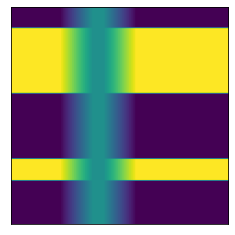

In [ ]:
img = convolve(a,kernel1)
imshower(img)

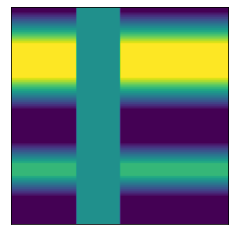

In [ ]:
img = convolve(a,kernel2)
imshower(img)

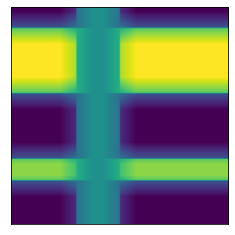

In [ ]:
img = convolve(a,kernel3)
imshower(img)

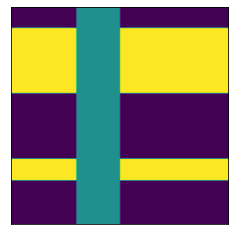

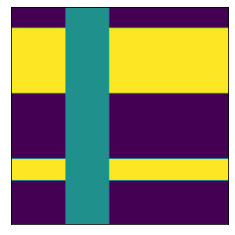

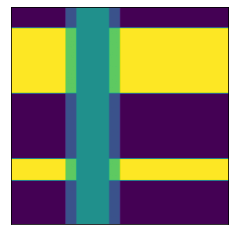

In [ ]:
b = np.copy(a)
x = 5
c = b[:,:x]
b[:,:-x] = b[:,x:]
b[:,-x:] = c
imshower(a)
imshower(b)
imshower((b+a)/2)


[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


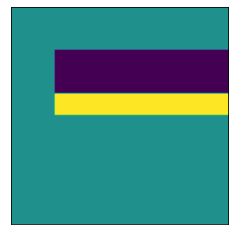

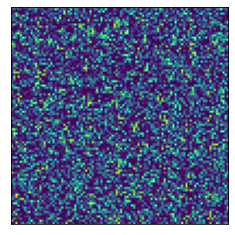

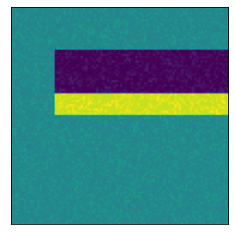

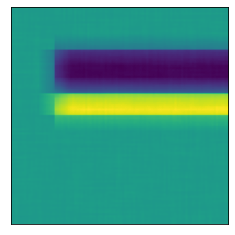

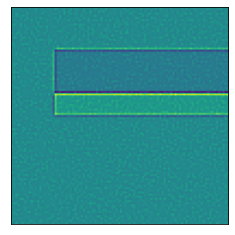

In [ ]:
f = np.ones((100,100))*0.5
f[20:40,20:]=0
f[40:50,20:]=1

noise = 0.1*np.random.rand(100, 100)**3

b = convolve(f+noise,kernel3)

sharp = np.ones((3,3))*-1
sharp[1,1]=9
print(sharp)
d = convolve(f+noise,sharp)

imshower(f)
imshower(noise)
imshower(f+noise)
imshower(b)
imshower(d)

after wiener


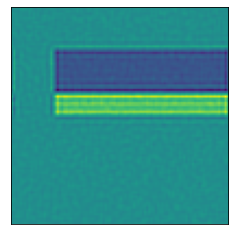

[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]]


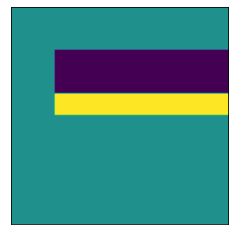

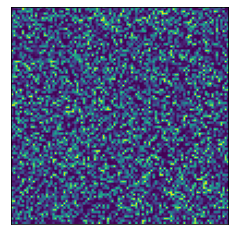

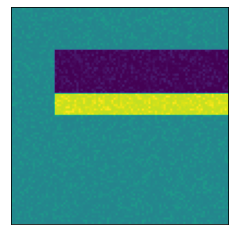

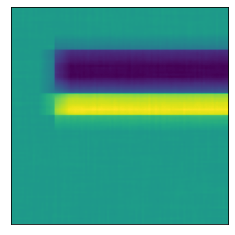

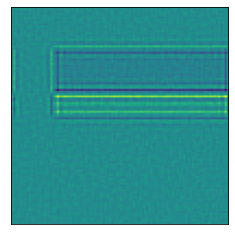

In [ ]:
f = np.ones((100,100))*0.5
f[20:40,20:]=0
f[40:50,20:]=1

noise = 0.1*np.random.rand(100, 100)**3

b = convolve(f+noise,kernel3)

from skimage import restoration
psf = np.ones((3,3)) / 3*3
w1 = restoration.wiener(f+noise,psf,1)
print('after wiener')
imshower(w1)
sharp = np.ones((3,3))*-1
sharp[1,1]=9
print(sharp)
d = convolve(w1,sharp)

imshower(f)
imshower(noise)
imshower(f+noise)
imshower(b)
imshower(d)

In [ ]:
a = np.array([1,4,2,6,3,6,9,0,3,7])
np.var(a)

7.289999999999999

In [ ]:
kernel = [1/3,1/3,1/3]

In [ ]:
b = convolve(a,kernel)
b

array([2, 2, 4, 3, 5, 6, 5, 4, 3, 5])

In [ ]:
np.var(b)

1.69

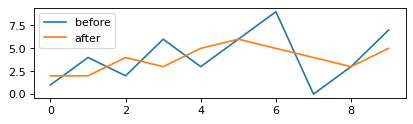

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(6, 1.5), dpi=80)

plt.plot(range(10),a,label='before')
plt.plot(range(10),b,label='after')
plt.legend()
plt.show()

In [ ]:
!wget https://cdn5.vectorstock.com/i/1000x1000/27/94/a-simple-nature-landscape-vector-23832794.jpg

--2022-08-12 14:34:10--  https://cdn5.vectorstock.com/i/1000x1000/27/94/a-simple-nature-landscape-vector-23832794.jpg
Resolving cdn5.vectorstock.com (cdn5.vectorstock.com)... 192.229.163.147
Connecting to cdn5.vectorstock.com (cdn5.vectorstock.com)|192.229.163.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168323 (164K) [image/jpeg]
Saving to: ‘a-simple-nature-landscape-vector-23832794.jpg.1’

a-simple-nature-lan 100%[===================>] 164.38K  --.-KB/s    in 0.02s   

2022-08-12 14:34:10 (7.60 MB/s) - ‘a-simple-nature-landscape-vector-23832794.jpg.1’ saved [168323/168323]



In [ ]:
import cv2

In [ ]:
name = "00004.ppm"

In [ ]:
# im.shape

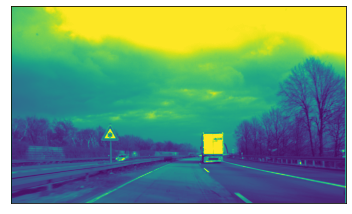

In [ ]:
im = cv2.imread(name,cv2.IMREAD_GRAYSCALE)
# im2 = im[10:-100,10:-30]
imshower(im)

In [ ]:
kernel = np.ones((7,7))/49

In [ ]:
f = np.copy(im)

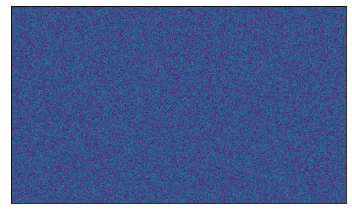

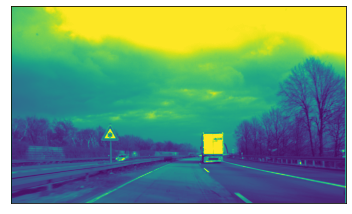

In [ ]:
imshower(noise)
imshower(im)

In [ ]:
f.max()

255

In [ ]:
img = np.copy(f)/255
psf = np.ones((5, 5)) / 25
b = convolve2d(img, psf, 'same')
rng = np.random.default_rng()
b += 0.1 * b.std() * rng.standard_normal(b.shape)
deconvolved_img,_ = restoration.unsupervised_wiener(b, psf)

In [ ]:
b -= b.min()
img -= img.min()
deconvolved_img -= deconvolved_img.min()


b = b / b.max()
img = img / img.max()
deconvolved_img = deconvolved_img / deconvolved_img.max()


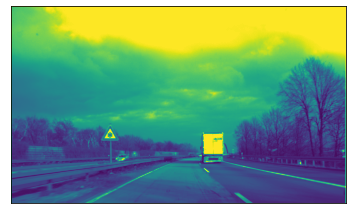

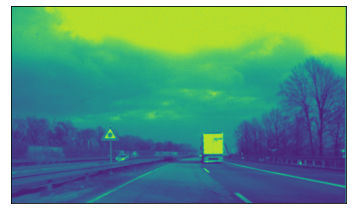

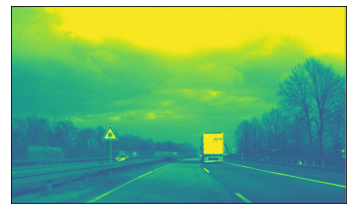

In [ ]:
imshower(img)
imshower(b)
imshower(deconvolved_img)

In [ ]:
def difrencecomputation(im1,im2):
    return int((np.abs(im1-im2).sum()/(im1.shape[0]*im1.shape[1]))*100)

In [ ]:
difrencecomputation(b,img),difrencecomputation(img,deconvolved_img)

(6, 12)

In [ ]:
from skimage import feature

In [ ]:
f.min(),f.max(),img.min(),img.max(),deconvolved_img.min(),deconvolved_img.max()

(9, 255, 0.0, 1.0, 0.0, 1.0)

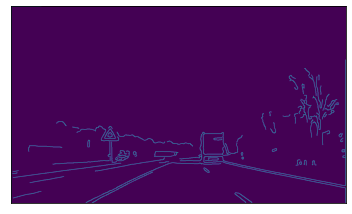

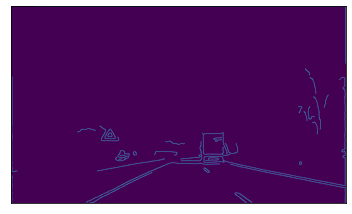

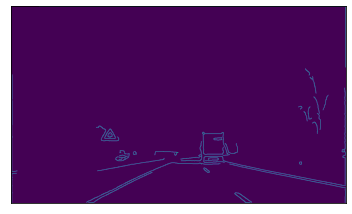

In [ ]:
edge1 = feature.canny(img,sigma=3)
edge2 = feature.canny(b,sigma=3)
edge3 = feature.canny(deconvolved_img,sigma=3)

imshower(edge1)
imshower(edge2)
imshower(edge3)


In [ ]:
def difrencecomputation2(im1,im2):
    return round((im1==im2).sum()/(im1.shape[0]*im1.shape[1]),3)

In [ ]:
difrencecomputation2(edge1,edge3)*100,difrencecomputation2(edge1,edge2)*100

(99.2, 99.0)

In [ ]:
edge = edge3 + 0

In [ ]:
difrencecomputation(b,img),difrencecomputation(img,deconvolved_img),difrencecomputation(img,deconvolved_img+edge*0.5),difrencecomputation(img,deconvolved_img+edge)

(6, 12, 12, 13)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])